## Title - Wine Quality Prediction

A wine quality prediction model aims to determine the quality of a wine based on its characteristics such as acidity, pH level, residual sugar, alcohol content, volatile acidity, and more. These features can be extracted from a dataset that includes a collection of wines along with their corresponding quality ratings, typically provided by experts through tasting evaluations.

To build a wine quality prediction model, Python offers several useful libraries such as scikit-learn, TensorFlow, and Keras. These libraries provide a wide range of machine learning algorithms and tools to preprocess the data, train the model, and evaluate its performance.

## Objective

Objective of wine qualiity prediction is to predict quality of wine. The model can be designed using the dataset having data about wines' fixed acidity, volatile acidity, citric acid, residual sugar, chlorides, free sulfur dioxide, total sulfar dioxide, density, pH, quality, sulphates and alcohol.

## Data Source

The dataset was taken from Kaggle which provides various kinds of dataset for projects.

Attributes in the dataset are :-

1. fixed acidity
2. volatile acidity
3. citric acid
4. residual sugar
5. chlorides
6. free sulfur dioxide
7. total sulfur dioxide
8. density
9. pH
10. sulphates
11. alcohol
12. quality

## Import Library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Import Data

In [ ]:
df = pd.read_csv("https://github.com/YBI-Foundation/Dataset/raw/main/WhiteWineQuality.csv", sep =';')

In [ ]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


## Describe Data

In [ ]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [ ]:
df.nunique()

fixed acidity            68
volatile acidity        125
citric acid              87
residual sugar          310
chlorides               160
free sulfur dioxide     132
total sulfur dioxide    251
density                 890
pH                      103
sulphates                79
alcohol                 103
quality                   7
dtype: int64

In [ ]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

## Data Visualization

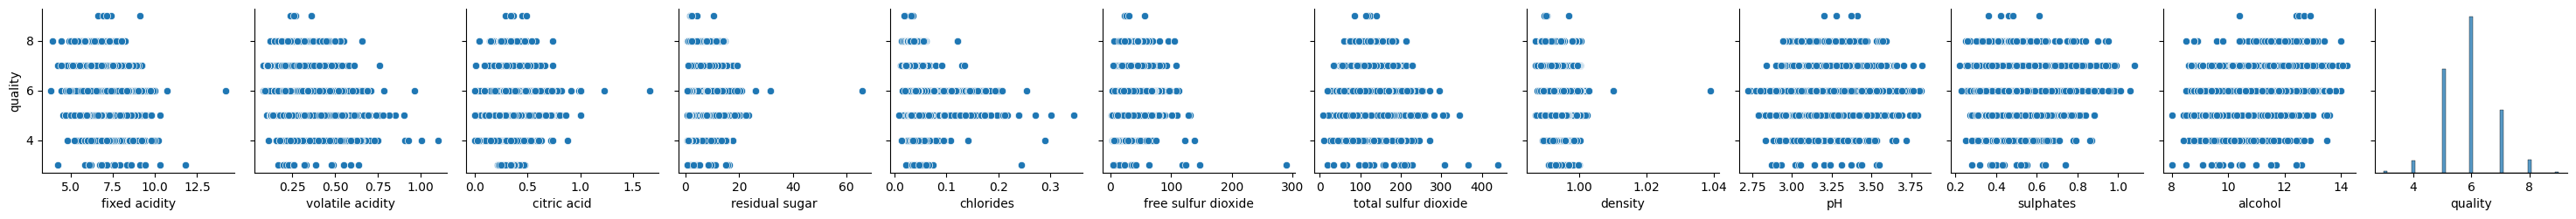

In [ ]:
sns.pairplot(df, x_vars = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density','pH', 'sulphates', 'alcohol', 'quality'], y_vars = ['quality']) ;

<Axes: xlabel='pH', ylabel='quality'>

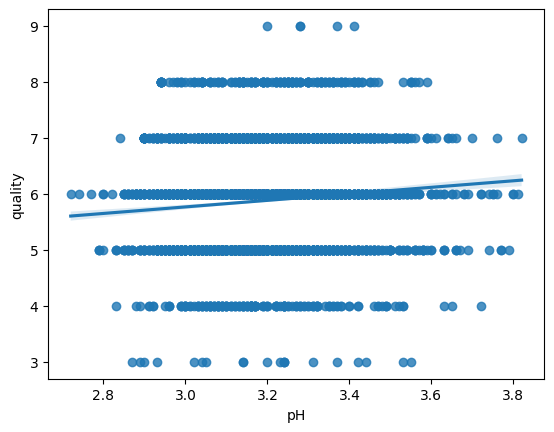

In [ ]:
sns.regplot(x = 'pH', y = 'quality', data = df)

## Data Preprocessing

In [ ]:
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.022697,0.289181,0.089021,0.023086,-0.049396,0.091070,0.265331,-0.425858,-0.017143,-0.120881,-0.113663
volatile acidity,-0.022697,1.000000,-0.149472,0.064286,0.070512,-0.097012,0.089261,0.027114,-0.031915,-0.035728,0.067718,-0.194723
citric acid,0.289181,-0.149472,1.000000,0.094212,0.114364,0.094077,0.121131,0.149503,-0.163748,0.062331,-0.075729,-0.009209
residual sugar,0.089021,0.064286,0.094212,1.000000,0.088685,0.299098,0.401439,0.838966,-0.194133,-0.026664,-0.450631,-0.097577
chlorides,0.023086,0.070512,0.114364,0.088685,1.000000,0.101392,0.198910,0.257211,-0.090439,0.016763,-0.360189,-0.209934
free sulfur dioxide,-0.049396,-0.097012,0.094077,0.299098,0.101392,1.000000,0.615501,0.294210,-0.000618,0.059217,-0.250104,0.008158
total sulfur dioxide,0.091070,0.089261,0.121131,0.401439,0.198910,0.615501,1.000000,0.529881,0.002321,0.134562,-0.448892,-0.174737
density,0.265331,0.027114,0.149503,0.838966,0.257211,0.294210,0.529881,1.000000,-0.093591,0.074493,-0.780138,-0.307123
pH,-0.425858,-0.031915,-0.163748,-0.194133,-0.090439,-0.000618,0.002321,-0.093591,1.000000,0.155951,0.121432,0.099427
sulphates,-0.017143,-0.035728,0.062331,-0.026664,0.016763,0.059217,0.134562,0.074493,0.155951,1.000000,-0.017433,0.053678


Removing Missing Values

In [ ]:
df = df.dropna()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


## Define Target variable (y) & Feature Varible (x)

In [ ]:
y = df['quality']
y.shape

(4898,)

In [ ]:
x = df[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density','pH', 'sulphates', 'alcohol']]
x.shape

(4898, 11)

In [ ]:
x

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9
...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8


## Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train , y_test = train_test_split(x, y, train_size = 0.7 , random_state = 2529)

In [ ]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((3428, 11), (1470, 11), (3428,), (1470,))

## Modelling

Linear Regression Model

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [ ]:
lr.fit(x_train, y_train)

LinearRegression()

In [ ]:
lr.intercept_

129.98477995745364

In [ ]:
lr.coef_

array([ 4.45098610e-02, -1.98084890e+00,  5.61922491e-02,  7.40269705e-02,
       -1.22912875e-01,  4.71029580e-03, -2.90299585e-04, -1.29664323e+02,
        5.20128272e-01,  6.51747348e-01,  2.32220578e-01])

**Mileage = 129.98 + 0.04 fixed acidity - 1.98 volatile acidity + 0.05 citric acid + 0.07 residual sugar - 0.01 chlorides + 0.004 free sulfur dioxide - 0.0002 total sulfur dioxide - 129.66 density + 0.52 pH + 0.65 Sulphates + 0.23 Alcohol**

## Prediction

In [ ]:
y_pred = lr.predict(x_test)

In [ ]:
y_pred

array([5.69994453, 5.2063583 , 6.11058938, ..., 6.00872698, 5.27848916,
       5.84608554])

## Model Evaluation

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error , mean_absolute_percentage_error

In [ ]:
mean_squared_error(y_test, y_pred)

0.5657063263034334

In [ ]:
mean_absolute_error(y_test, y_pred)

0.5845725507831588

In [ ]:
mean_absolute_percentage_error(y_test, y_pred)

0.10322338831197873

## Explaination

Wine quality predictor is a machine learning model that predicts the quality of wine based on its chemical properties. The model is built using Python programming language and machine learning libraries available in Python1.

The model uses regression analysis to estimate the relationship between dependent variables (quality of wine) and independent variables (chemical properties)

Through this model, winemakers can make informed decisions about wine quality improvement, blending, or market positioning. Python's versatility and extensive libraries make it an ideal choice for developing such prediction models, enabling winemakers to enhance production processes and deliver superior quality wines.
